In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import skew, norm, probplot, boxcox
from sklearn import preprocessing
import math
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [77]:
df=pd.read_csv('Users.csv')
df

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,COUNTER,add_to_cart_order_ratio,reorder_ratio,product_dup,user_id_dup
0,1556732,27015,1,1,Skinny Margarita,6,2,other,other,145935,prior,7,0,13,8.0,1,7.833333,0.222222,27015,145935
1,870210,29615,1,0,"Bread, Country Buttermilk",112,3,bread,bakery,166045,prior,2,5,8,8.0,1,6.248540,0.011806,29615,166045
2,2909661,22124,10,1,Total 0% Raspberry Yogurt,120,16,yogurt,dairy eggs,79838,prior,19,4,14,6.0,1,7.531227,0.003755,22124,79838
3,281417,27313,13,1,Light Mozarella String Cheese,21,16,packaged cheese,dairy eggs,77516,prior,3,2,13,16.0,1,8.212429,0.005096,27313,77516
4,1975712,24964,5,1,Organic Garlic,83,4,fresh vegetables,produce,182059,prior,10,1,13,7.0,1,8.769043,0.004001,24964,182059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81909,2176582,651,14,0,Organic Salted Butter,36,16,butter,dairy eggs,113381,prior,6,4,18,6.0,1,8.402328,0.006642,651,113381
81910,412690,39275,5,1,Organic Blueberries,123,4,packaged vegetables fruits,produce,54818,prior,11,3,17,6.0,1,8.192694,0.005929,39275,54818
81911,2022477,40709,15,1,Sea Salt & Vinegar Potato Chips,107,19,chips pretzels,snacks,5356,prior,16,1,21,7.0,1,9.543514,0.004061,40709,5356
81912,2836540,7676,2,0,Organic Lowfat Plain Yogurt,120,16,yogurt,dairy eggs,44340,prior,4,4,7,7.0,1,7.478656,0.088646,7676,44340


In [78]:
df.drop(columns=['product_dup','user_id_dup'],inplace=True)
df

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,COUNTER,add_to_cart_order_ratio,reorder_ratio
0,1556732,27015,1,1,Skinny Margarita,6,2,other,other,145935,prior,7,0,13,8.0,1,7.833333,0.222222
1,870210,29615,1,0,"Bread, Country Buttermilk",112,3,bread,bakery,166045,prior,2,5,8,8.0,1,6.248540,0.011806
2,2909661,22124,10,1,Total 0% Raspberry Yogurt,120,16,yogurt,dairy eggs,79838,prior,19,4,14,6.0,1,7.531227,0.003755
3,281417,27313,13,1,Light Mozarella String Cheese,21,16,packaged cheese,dairy eggs,77516,prior,3,2,13,16.0,1,8.212429,0.005096
4,1975712,24964,5,1,Organic Garlic,83,4,fresh vegetables,produce,182059,prior,10,1,13,7.0,1,8.769043,0.004001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81909,2176582,651,14,0,Organic Salted Butter,36,16,butter,dairy eggs,113381,prior,6,4,18,6.0,1,8.402328,0.006642
81910,412690,39275,5,1,Organic Blueberries,123,4,packaged vegetables fruits,produce,54818,prior,11,3,17,6.0,1,8.192694,0.005929
81911,2022477,40709,15,1,Sea Salt & Vinegar Potato Chips,107,19,chips pretzels,snacks,5356,prior,16,1,21,7.0,1,9.543514,0.004061
81912,2836540,7676,2,0,Organic Lowfat Plain Yogurt,120,16,yogurt,dairy eggs,44340,prior,4,4,7,7.0,1,7.478656,0.088646


/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


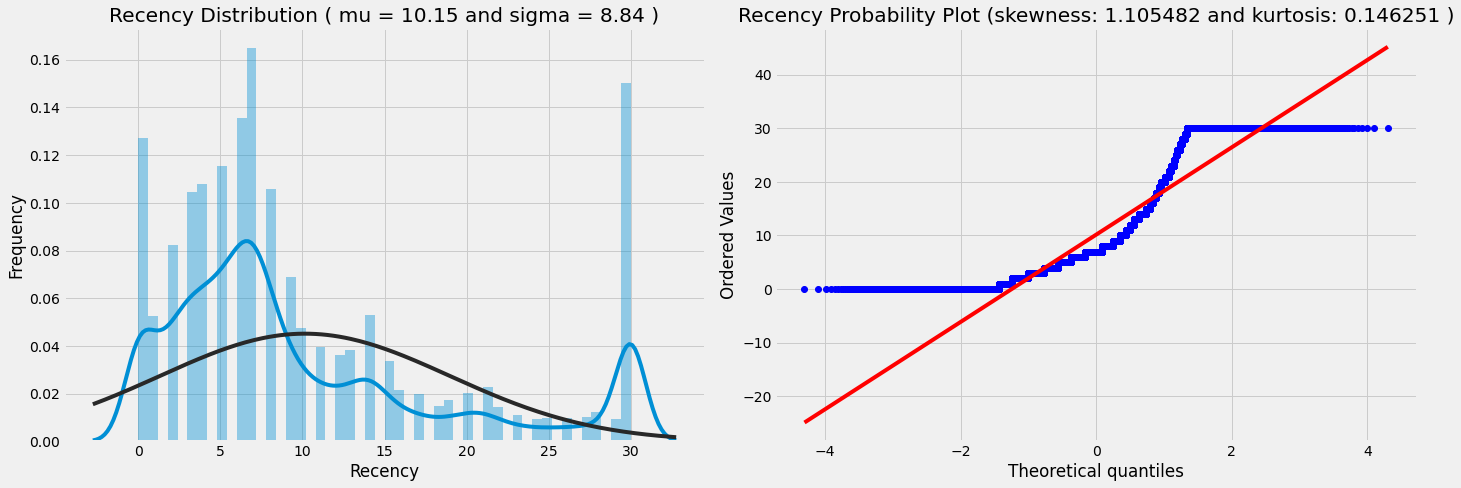

In [79]:
#plotting recency 
def QQ_plot(data, measure):
    fig = plt.figure(figsize=(20,7))

    #Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(data)

    #Kernel Density plot
    fig1 = fig.add_subplot(121)
    sns.distplot(data, fit=norm)
    fig1.set_title(measure + ' Distribution ( mu = {:.2f} and sigma = {:.2f} )'.format(mu, sigma), loc='center')
    fig1.set_xlabel(measure)
    fig1.set_ylabel('Frequency')

    #QQ plot
    fig2 = fig.add_subplot(122)
    res = probplot(data, plot=fig2)
    fig2.set_title(measure + ' Probability Plot (skewness: {:.6f} and kurtosis: {:.6f} )'.format(data.skew(), data.kurt()), loc='center')

    plt.tight_layout()
    plt.show()

QQ_plot(df['days_since_prior_order'], 'Recency')

In [80]:
#plotting frequency
freq=df.groupby(by=['user_id'],as_index=False).agg({'order_id':'count'})
freq

,user_id,order_id
0,113,2
1,131,38
2,421,9
3,519,13
4,558,148
...,...,...
995,204775,16
996,204955,10
997,205017,10
998,205316,28


In [86]:
freq.rename(columns={'order_id':'freq'},inplace=True)
final_df=pd.merge(df,freq,how='left',on=['user_id'])
final_df

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,COUNTER,add_to_cart_order_ratio,reorder_ratio,freq
0,1556732,27015,1,1,Skinny Margarita,6,2,other,other,145935,prior,7,0,13,8.0,1,7.833333,0.222222,141
1,870210,29615,1,0,"Bread, Country Buttermilk",112,3,bread,bakery,166045,prior,2,5,8,8.0,1,6.248540,0.011806,24
2,2909661,22124,10,1,Total 0% Raspberry Yogurt,120,16,yogurt,dairy eggs,79838,prior,19,4,14,6.0,1,7.531227,0.003755,289
3,281417,27313,13,1,Light Mozarella String Cheese,21,16,packaged cheese,dairy eggs,77516,prior,3,2,13,16.0,1,8.212429,0.005096,20
4,1975712,24964,5,1,Organic Garlic,83,4,fresh vegetables,produce,182059,prior,10,1,13,7.0,1,8.769043,0.004001,299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81909,2176582,651,14,0,Organic Salted Butter,36,16,butter,dairy eggs,113381,prior,6,4,18,6.0,1,8.402328,0.006642,338
81910,412690,39275,5,1,Organic Blueberries,123,4,packaged vegetables fruits,produce,54818,prior,11,3,17,6.0,1,8.192694,0.005929,39
81911,2022477,40709,15,1,Sea Salt & Vinegar Potato Chips,107,19,chips pretzels,snacks,5356,prior,16,1,21,7.0,1,9.543514,0.004061,239
81912,2836540,7676,2,0,Organic Lowfat Plain Yogurt,120,16,yogurt,dairy eggs,44340,prior,4,4,7,7.0,1,7.478656,0.088646,27


/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


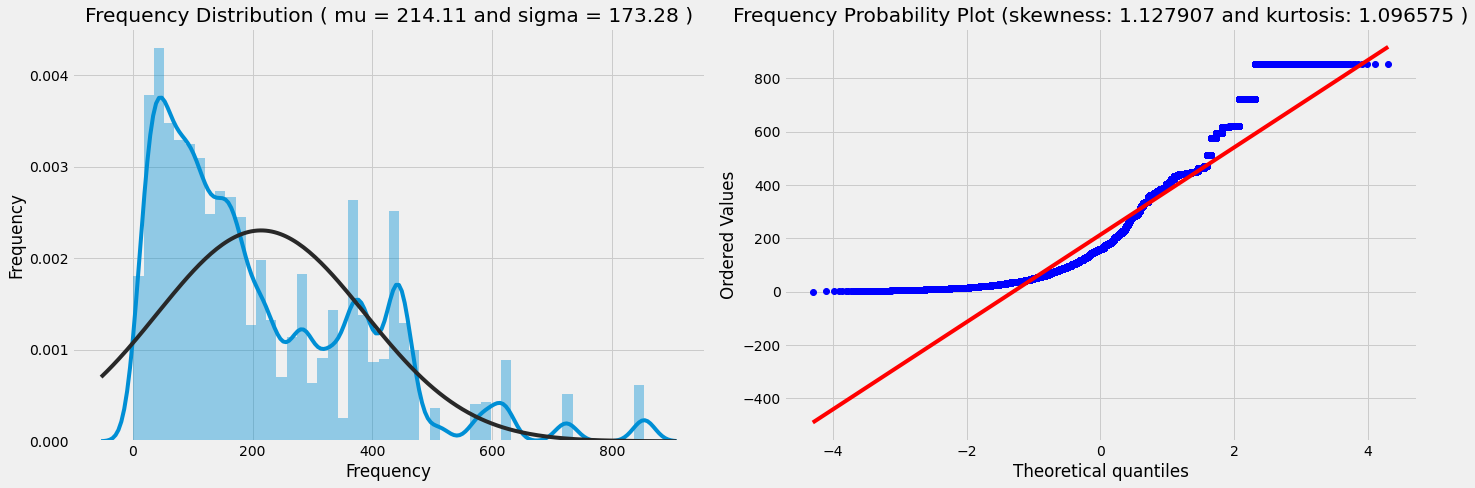

In [82]:
#plotting frequency

#plotting recency 
def QQ_plot(data, measure):
    fig = plt.figure(figsize=(20,7))

    #Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(data)

    #Kernel Density plot
    fig1 = fig.add_subplot(121)
    sns.distplot(data, fit=norm)
    fig1.set_title(measure + ' Distribution ( mu = {:.2f} and sigma = {:.2f} )'.format(mu, sigma), loc='center')
    fig1.set_xlabel(measure)
    fig1.set_ylabel('Frequency')

    #QQ plot
    fig2 = fig.add_subplot(122)
    res = probplot(data, plot=fig2)
    fig2.set_title(measure + ' Probability Plot (skewness: {:.6f} and kurtosis: {:.6f} )'.format(data.skew(), data.kurt()), loc='center')

    plt.tight_layout()
    plt.show()

QQ_plot(final_df['freq'], 'Frequency')

In [83]:
final_df

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,COUNTER,add_to_cart_order_ratio,reorder_ratio,freq
0,1556732,27015,1,1,Skinny Margarita,6,2,other,other,145935,prior,7,0,13,8.0,1,7.833333,0.222222,141
1,870210,29615,1,0,"Bread, Country Buttermilk",112,3,bread,bakery,166045,prior,2,5,8,8.0,1,6.248540,0.011806,24
2,2909661,22124,10,1,Total 0% Raspberry Yogurt,120,16,yogurt,dairy eggs,79838,prior,19,4,14,6.0,1,7.531227,0.003755,289
3,281417,27313,13,1,Light Mozarella String Cheese,21,16,packaged cheese,dairy eggs,77516,prior,3,2,13,16.0,1,8.212429,0.005096,20
4,1975712,24964,5,1,Organic Garlic,83,4,fresh vegetables,produce,182059,prior,10,1,13,7.0,1,8.769043,0.004001,299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81909,2176582,651,14,0,Organic Salted Butter,36,16,butter,dairy eggs,113381,prior,6,4,18,6.0,1,8.402328,0.006642,338
81910,412690,39275,5,1,Organic Blueberries,123,4,packaged vegetables fruits,produce,54818,prior,11,3,17,6.0,1,8.192694,0.005929,39
81911,2022477,40709,15,1,Sea Salt & Vinegar Potato Chips,107,19,chips pretzels,snacks,5356,prior,16,1,21,7.0,1,9.543514,0.004061,239
81912,2836540,7676,2,0,Organic Lowfat Plain Yogurt,120,16,yogurt,dairy eggs,44340,prior,4,4,7,7.0,1,7.478656,0.088646,27


In [89]:
grouped=final_df.groupby(by=['user_id'],as_index=False).agg({'days_since_prior_order':'mean','freq':'mean'})

In [90]:
feature_vector = ['days_since_prior_order', 'freq']
X_subset = grouped[feature_vector] #.as_matrix()
scaler = preprocessing.StandardScaler().fit(X_subset)
X_scaled = scaler.transform(X_subset)
df_scaled=pd.DataFrame(X_scaled, columns=X_subset.columns)
df_scaled

,days_since_prior_order,freq
0,-1.584293,-0.767957
1,0.716960,-0.422004
2,1.345605,-0.700688
3,0.729239,-0.662249
4,-0.895523,0.635072
...,...,...
995,2.017235,-0.633420
996,1.296929,-0.691078
997,-1.466349,-0.691078
998,1.436537,-0.518102


In [91]:
grouped['days_since_prior_order_scaled']=df_scaled['days_since_prior_order']
grouped['freq_scaled']=df_scaled['freq']
grouped

,user_id,days_since_prior_order,freq,days_since_prior_order_scaled,freq_scaled
0,113,3.500000,2.0,-1.584293,-0.767957
1,131,17.157895,38.0,0.716960,-0.422004
2,421,20.888889,9.0,1.345605,-0.700688
3,519,17.230769,13.0,0.729239,-0.662249
4,558,7.587838,148.0,-0.895523,0.635072
...,...,...,...,...,...
995,204775,24.875000,16.0,2.017235,-0.633420
996,204955,20.600000,10.0,1.296929,-0.691078
997,205017,4.200000,10.0,-1.466349,-0.691078
998,205316,21.428571,28.0,1.436537,-0.518102


In [93]:
features=['days_since_prior_order_scaled','freq_scaled']
segmentation_df=grouped[features]
segmentation_df

,days_since_prior_order_scaled,freq_scaled
0,-1.584293,-0.767957
1,0.716960,-0.422004
2,1.345605,-0.700688
3,0.729239,-0.662249
4,-0.895523,0.635072
...,...,...
995,2.017235,-0.633420
996,1.296929,-0.691078
997,-1.466349,-0.691078
998,1.436537,-0.518102


In [45]:
segmentation_df['labels']=labels

<ipython-input-45-086cbc946e03>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segmentation_df['labels']=labels


For n_clusters = 2 The average silhouette_score is : 0.40318341154038717
For n_clusters = 4 The average silhouette_score is : 0.4054051971199026
For n_clusters = 6 The average silhouette_score is : 0.4273431019576713
For n_clusters = 8 The average silhouette_score is : 0.39249890545763216
For n_clusters = 10 The average silhouette_score is : 0.38345283956153003
For n_clusters = 12 The average silhouette_score is : 0.37253635835395443
For n_clusters = 14 The average silhouette_score is : 0.3795688459043623
For n_clusters = 16 The average silhouette_score is : 0.3804129084026125
For n_clusters = 18 The average silhouette_score is : 0.37537079350809655
For n_clusters = 20 The average silhouette_score is : 0.37923387493224736


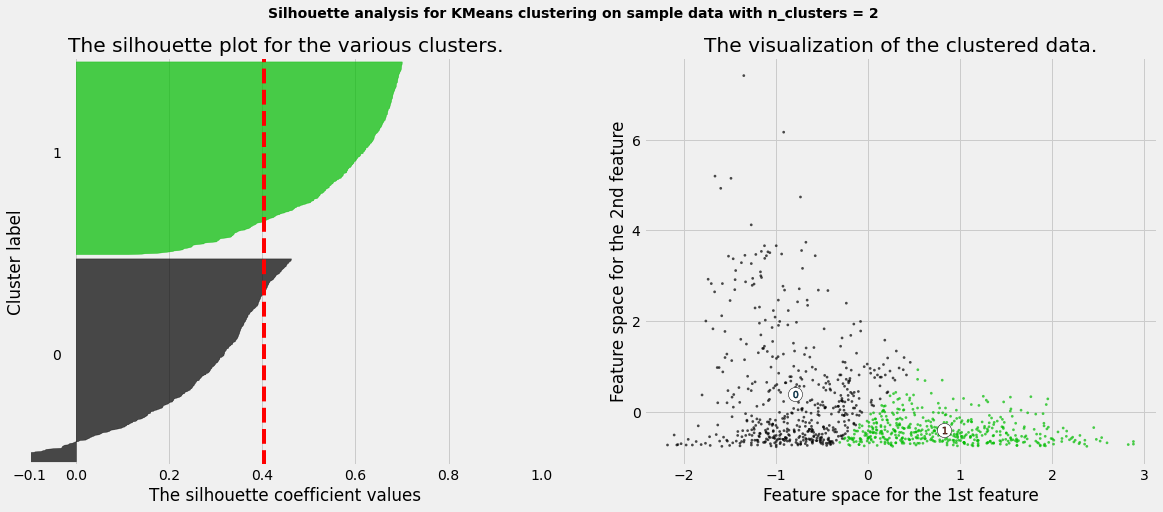

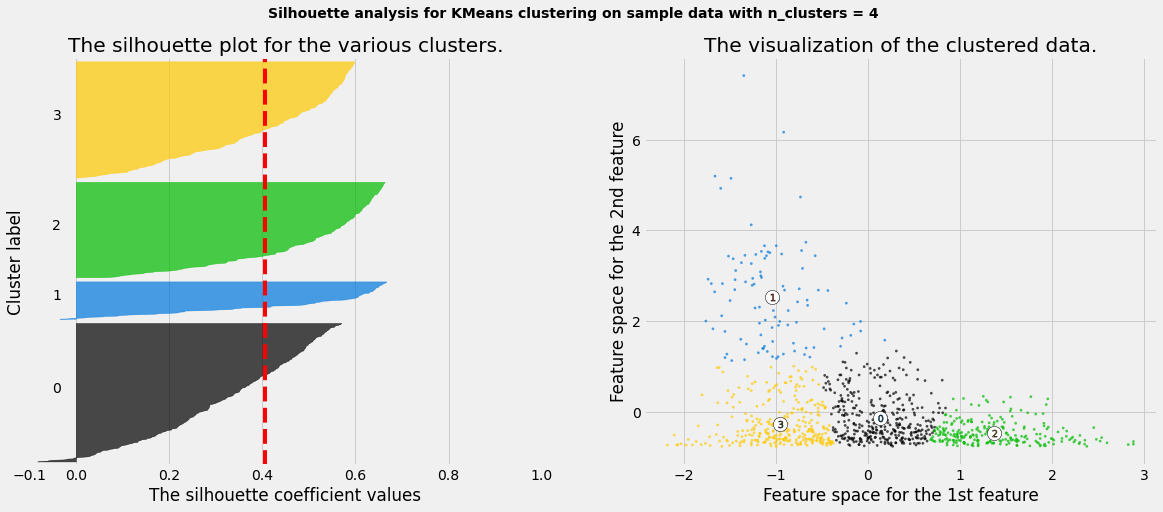

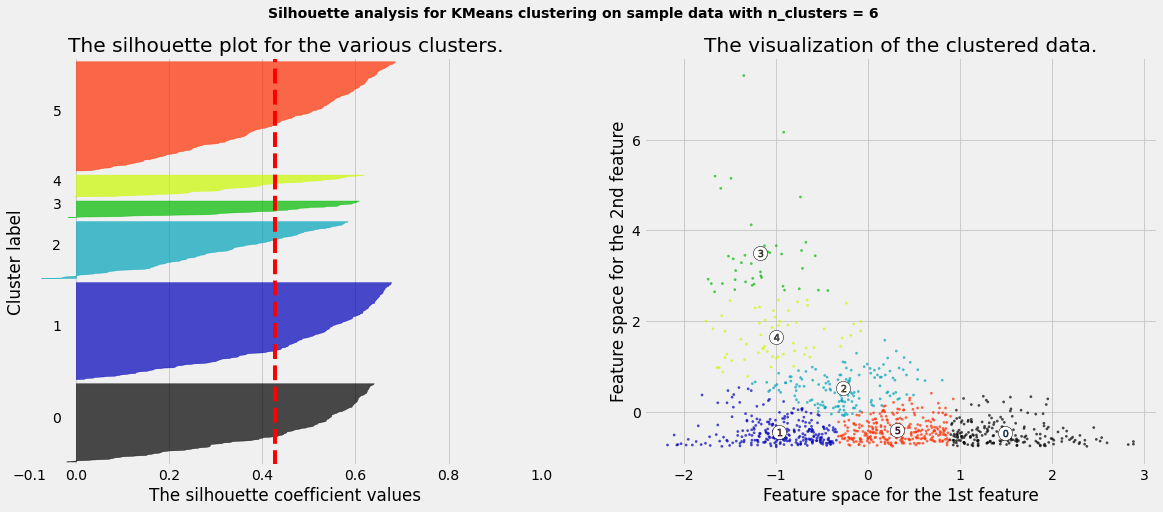

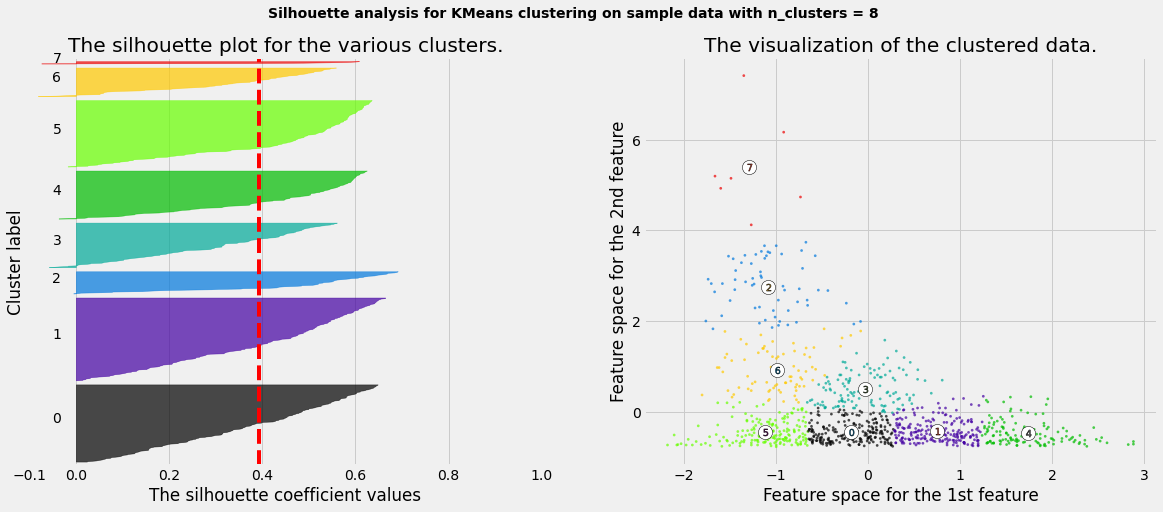

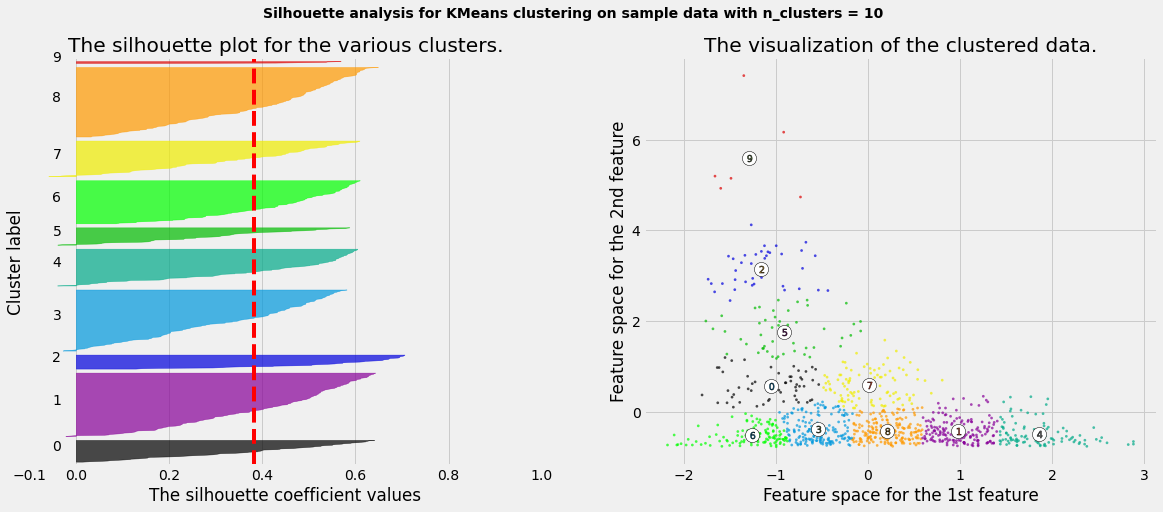

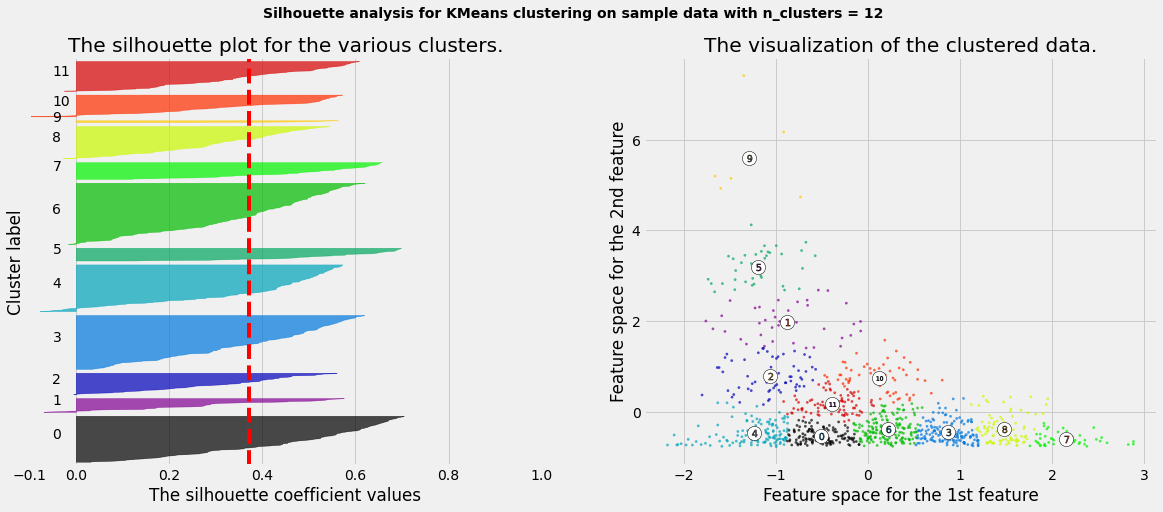

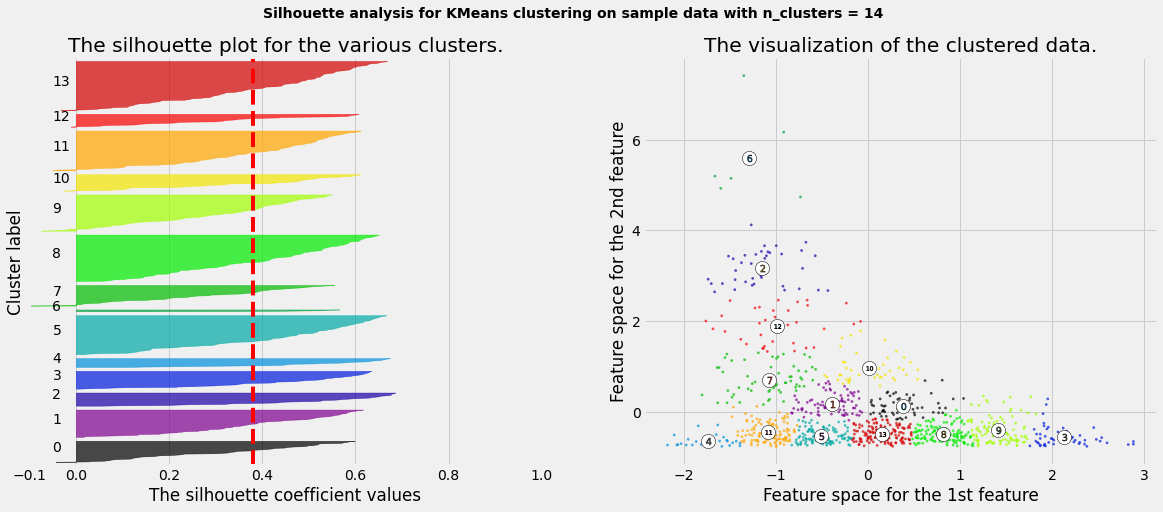

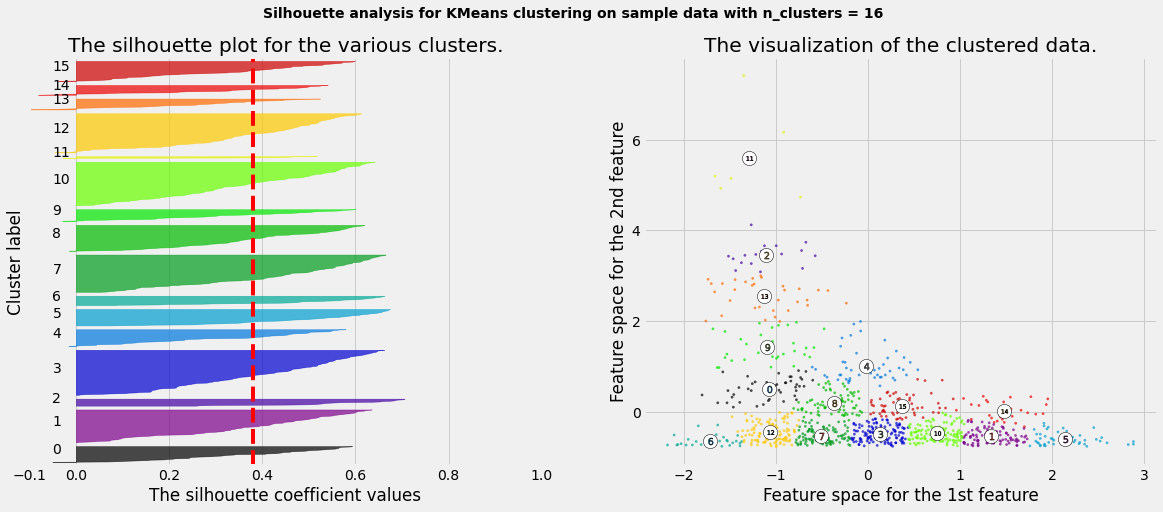

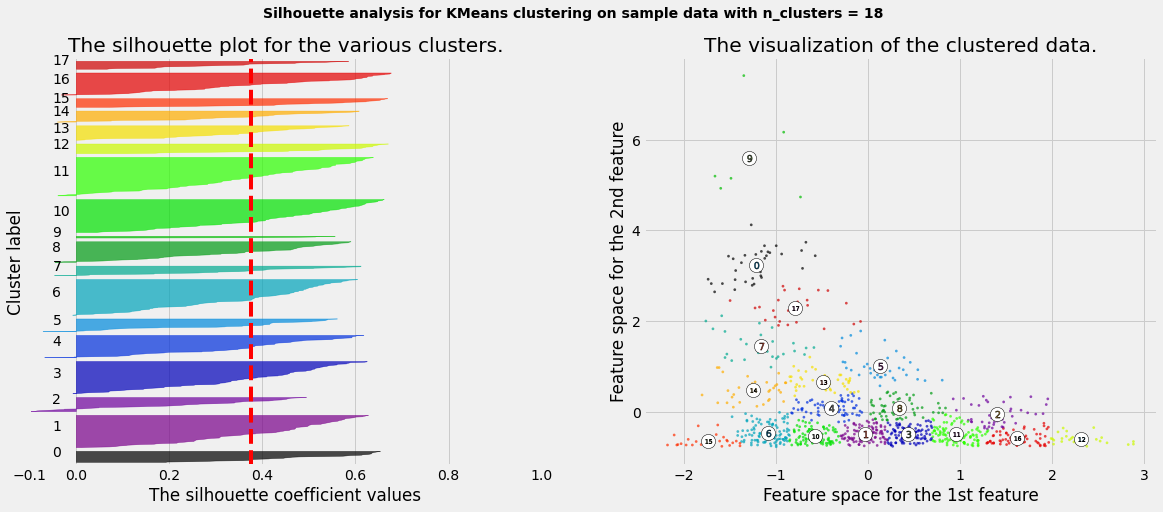

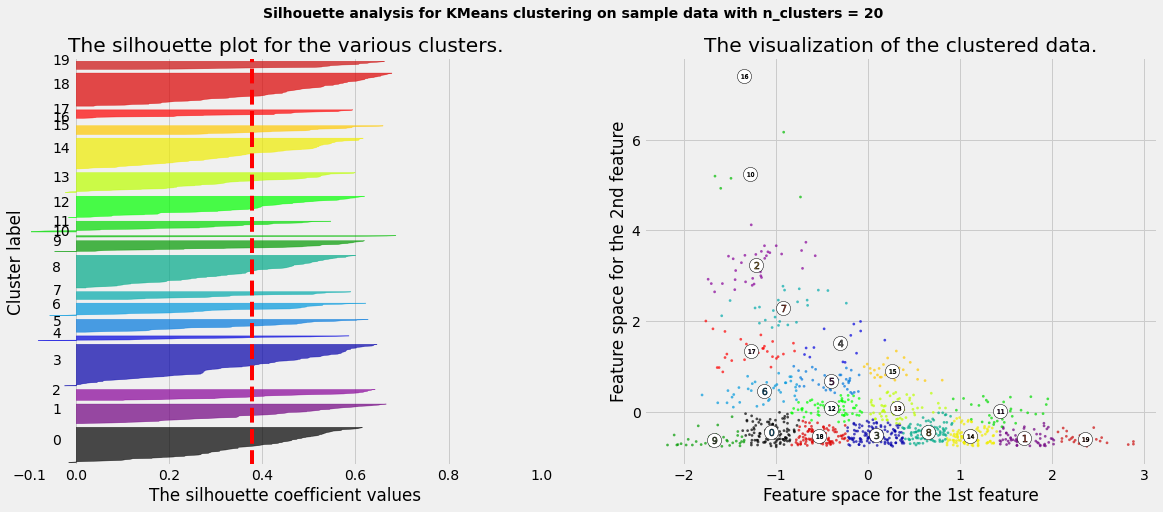

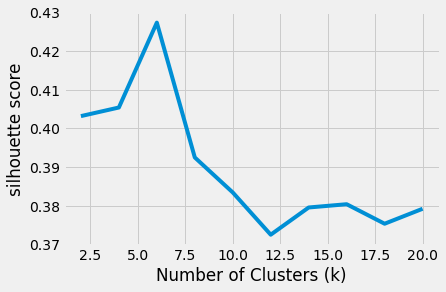

In [97]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import matplotlib.style as style

range_n_clusters = [2,4,6,8,10,12,14,16,18,20]
silhouette_avg_n_clusters = []

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all

    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(segmentation_df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(segmentation_df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(segmentation_df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    silhouette_avg_n_clusters.append(silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(segmentation_df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(segmentation_df.iloc[:, 0], segmentation_df.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


style.use("fivethirtyeight")
plt.plot(range_n_clusters, silhouette_avg_n_clusters)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("silhouette score")
plt.show()

In [99]:
#k-means using best cluster number=6

clusterer = KMeans(n_clusters=6, random_state=42)
knn_cluster_labels = clusterer.fit_predict(segmentation_df)

In [156]:
from sklearn.cluster import AgglomerativeClustering
cluster_size=[i for i in range(2,30)]
def find_best_cluster(df):
    final_score={}
    best_score=0
    best_cluster=0
    for i in cluster_size:
        agglo = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='average')  
        labels=agglo.fit_predict(segmentation_df)
        silhouette_avg = silhouette_score(segmentation_df,labels)
        if best_score < silhouette_avg:
            best_score=silhouette_avg
            best_cluster=i
    final_score[best_cluster]=best_score
    return final_score

In [157]:
cluster = find_best_cluster(segmentation_df) 
x,y=next(iter(cluster.items()))
agglo = AgglomerativeClustering(n_clusters=x, affinity='euclidean', linkage='average')  
hierarchical_labels=agglo.fit_predict(segmentation_df)

0.7450739482368417
0.4909904289646061
0.38710810817961877
0.4253453286089557
0.42264705778610495
0.35547838077181565
0.3466797151435374
0.34560495951788583
0.32942984204297143
0.33997353996247875
0.3797308435737466
0.3755435632142746
0.3739513704617303
0.3567623443438423
0.3549088798434721
0.3690385561738052
0.3673245226772829
0.3630287486236291
0.3554659320277432
0.35981827932885635
0.36071969448256386
0.35746647495543094
0.360287566006106
0.35880027331611974
0.35953119128609806
0.35893844113294726
0.35044673607602383
0.3476480690926004


For n_clusters = 2 The average silhouette_score is : 0.3899722450072808
For n_clusters = 3 The average silhouette_score is : 0.19764002764228394
For n_clusters = 4 The average silhouette_score is : 0.31270566576984365
For n_clusters = 5 The average silhouette_score is : 0.24070774411044044
For n_clusters = 6 The average silhouette_score is : 0.23862483756942493
For n_clusters = 7 The average silhouette_score is : 0.06930737757281122
For n_clusters = 8 The average silhouette_score is : 0.19248639795676395
For n_clusters = 9 The average silhouette_score is : 0.16829619812487395
For n_clusters = 10 The average silhouette_score is : 0.17020885202125813


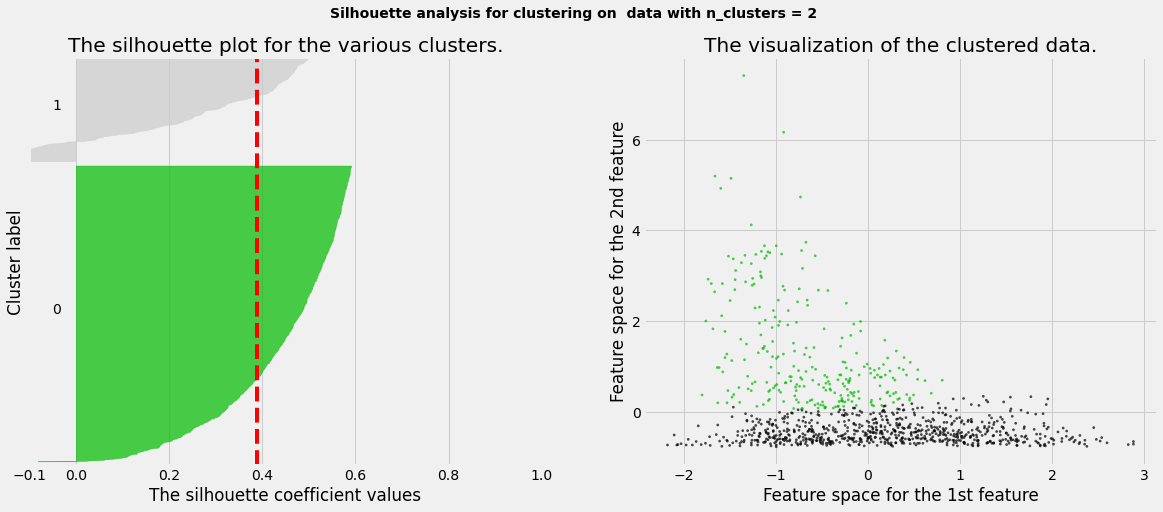

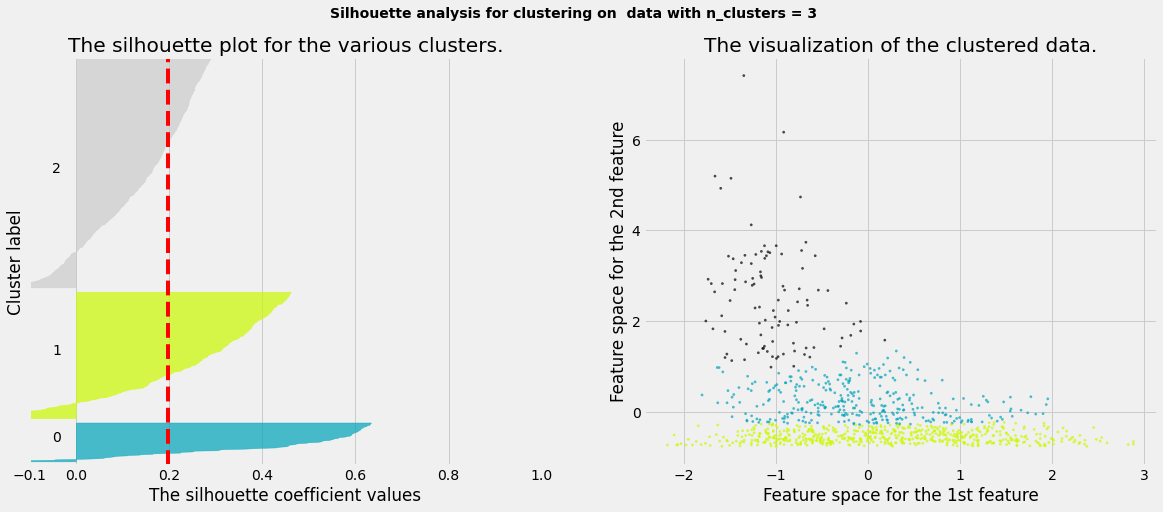

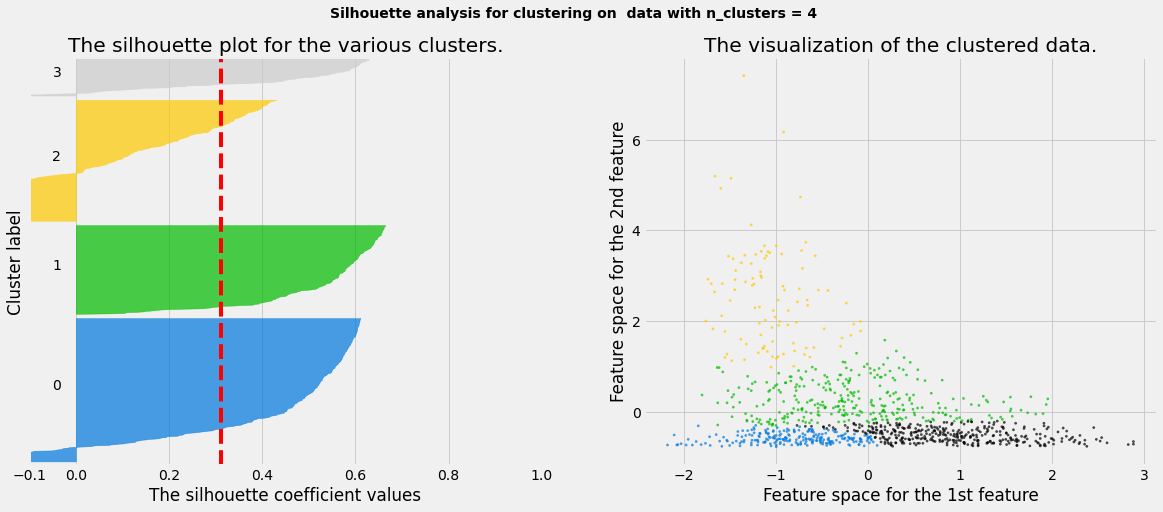

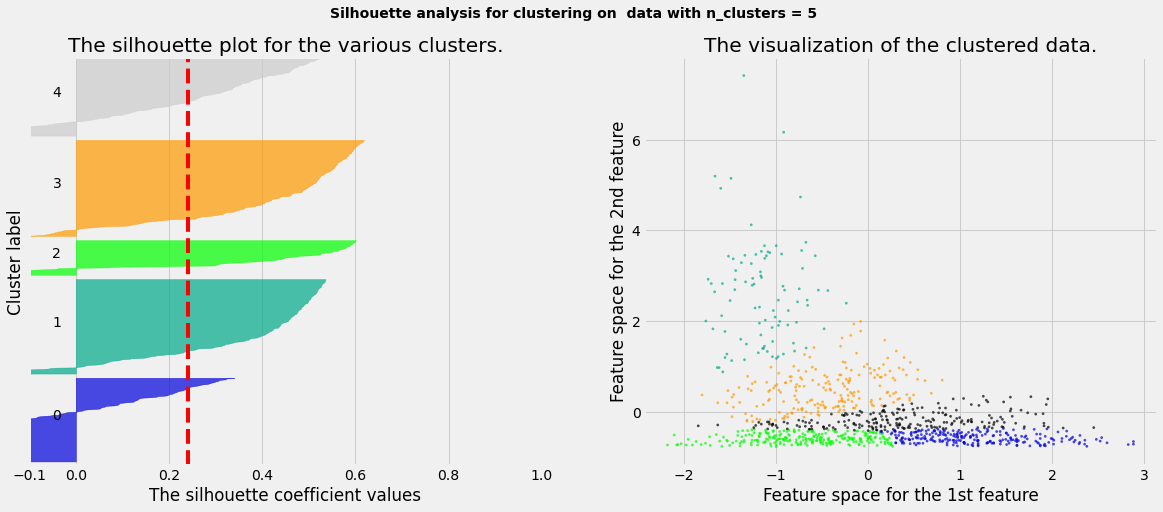

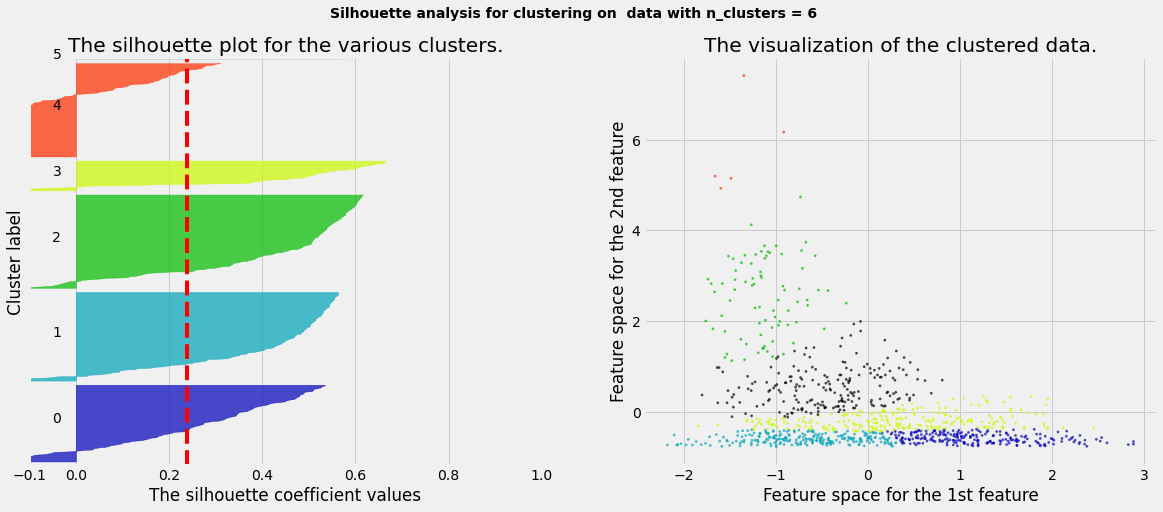

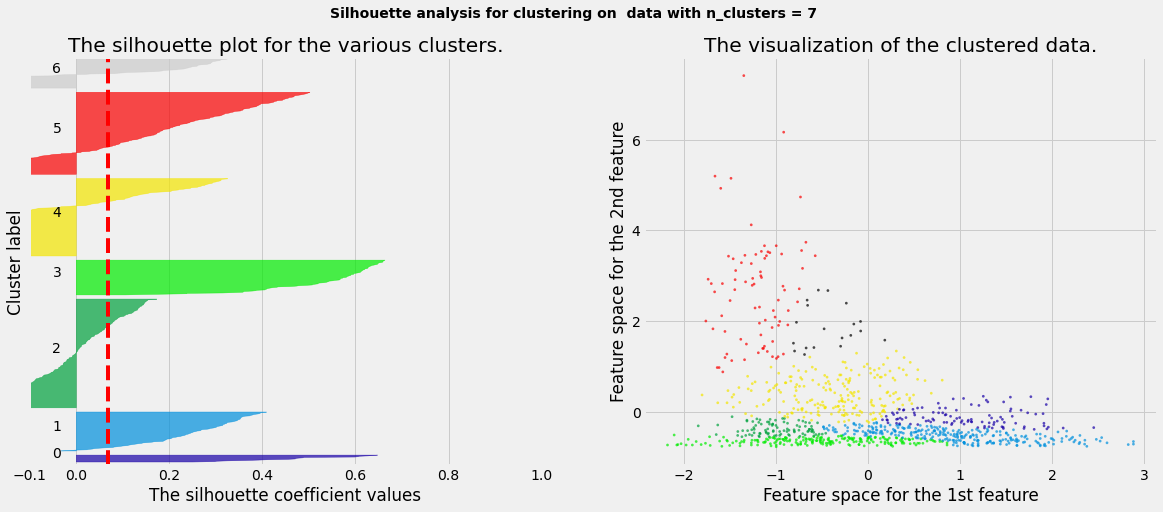

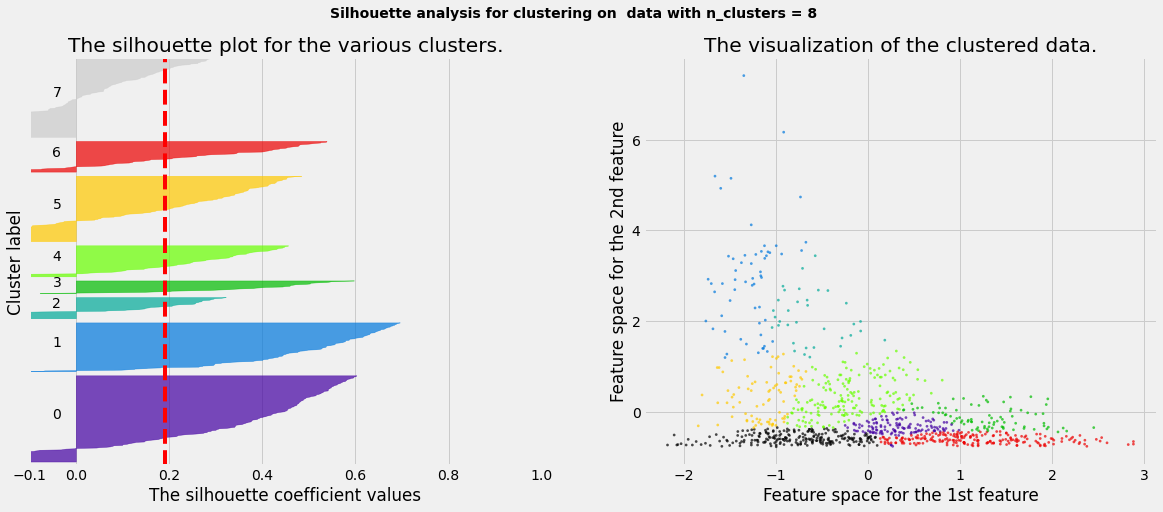

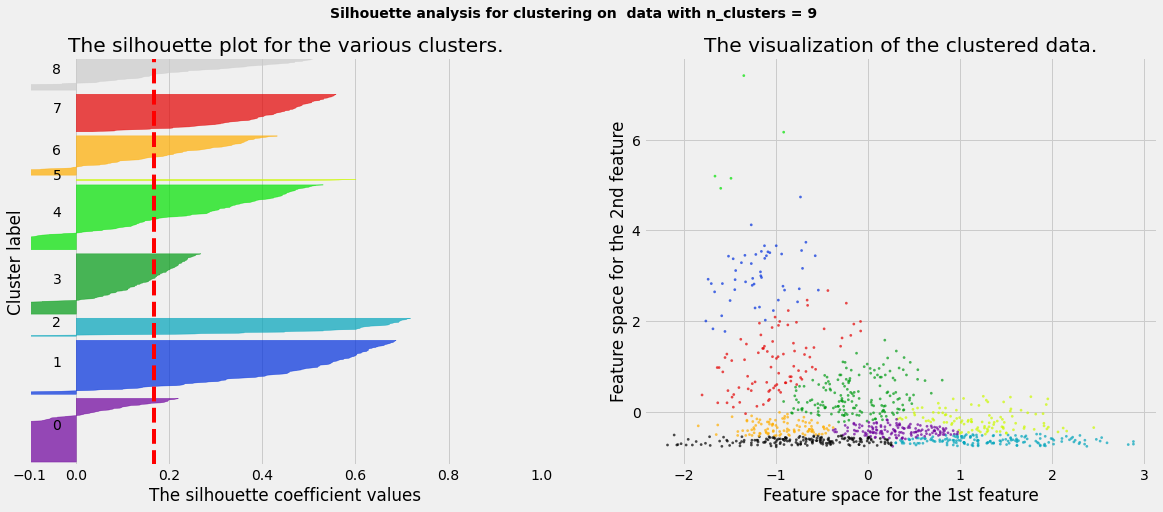

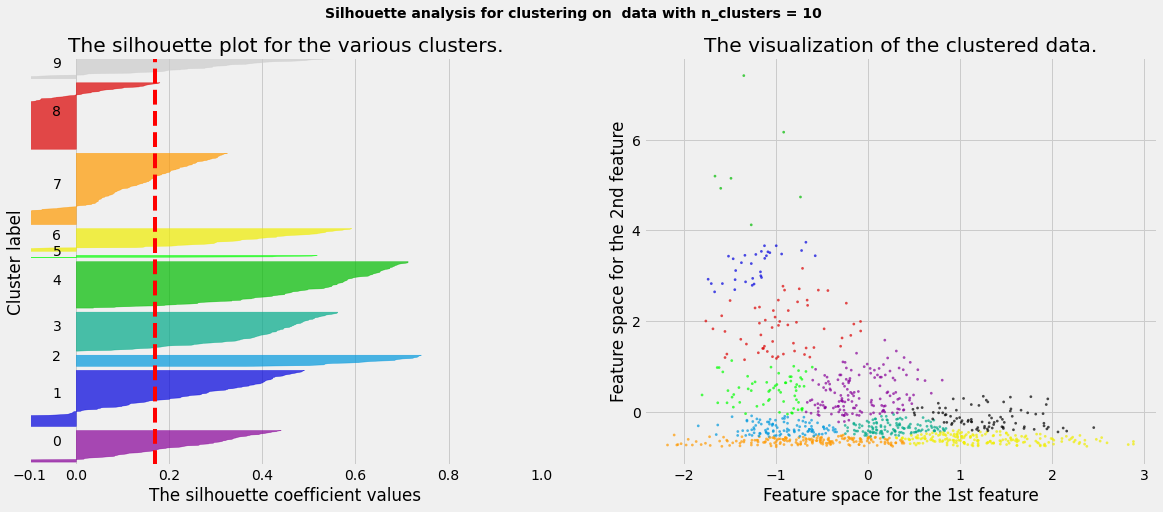

In [198]:
for n_clusters in range(2,11):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
 
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(grouped) + (n_clusters) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    
#     clusterer = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
#     cluster_labels = clusterer.fit_predict(segmentation_df)
    
    gmm = GaussianMixture(n_components=n_clusters)
    cluster_labels=gmm.fit_predict(segmentation_df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(segmentation_df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(segmentation_df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i+1) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral((cluster_labels.astype(float)) / n_clusters)
    ax2.scatter(segmentation_df.iloc[:, 0], segmentation_df.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

   

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for clustering on  data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()



In [193]:
final_data=pd.merge(final_df,grouped,how='left',on=['user_id'])

For n_clusters = 4 The average silhouette_score is : 0.39733906429248933
For n_clusters = 5 The average silhouette_score is : 0.40202609384874755
For n_clusters = 6 The average silhouette_score is : 0.4042809915651797
For n_clusters = 7 The average silhouette_score is : 0.38437617071417074
For n_clusters = 8 The average silhouette_score is : 0.3853648334461262
For n_clusters = 9 The average silhouette_score is : 0.3811210110564674
For n_clusters = 10 The average silhouette_score is : 0.3468953190016116


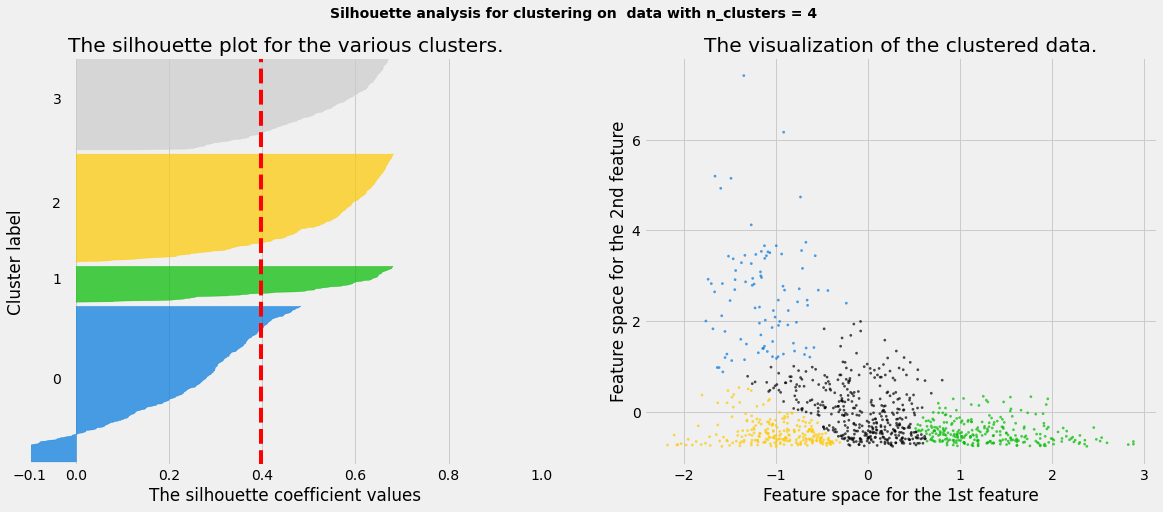

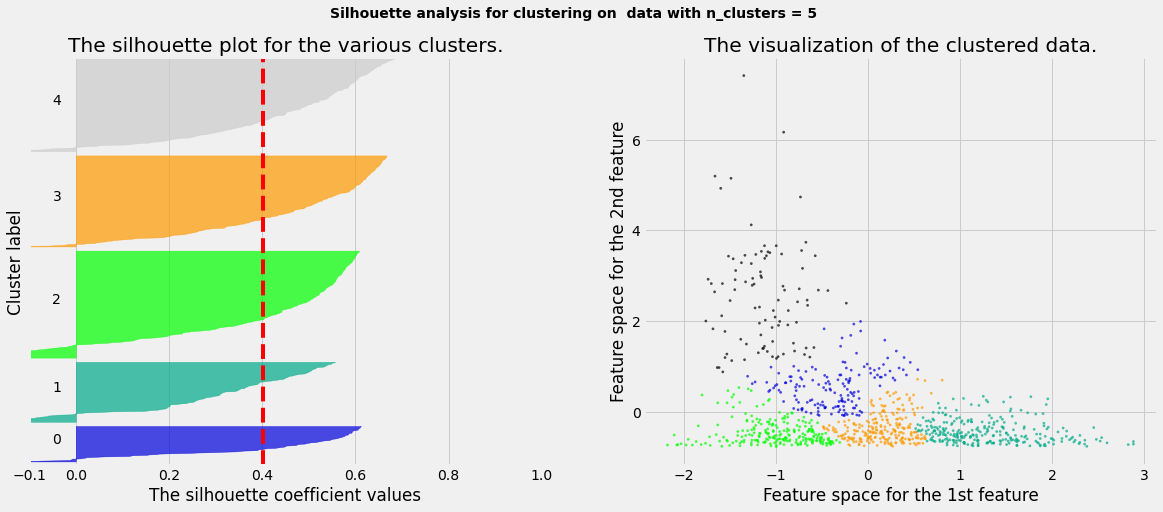

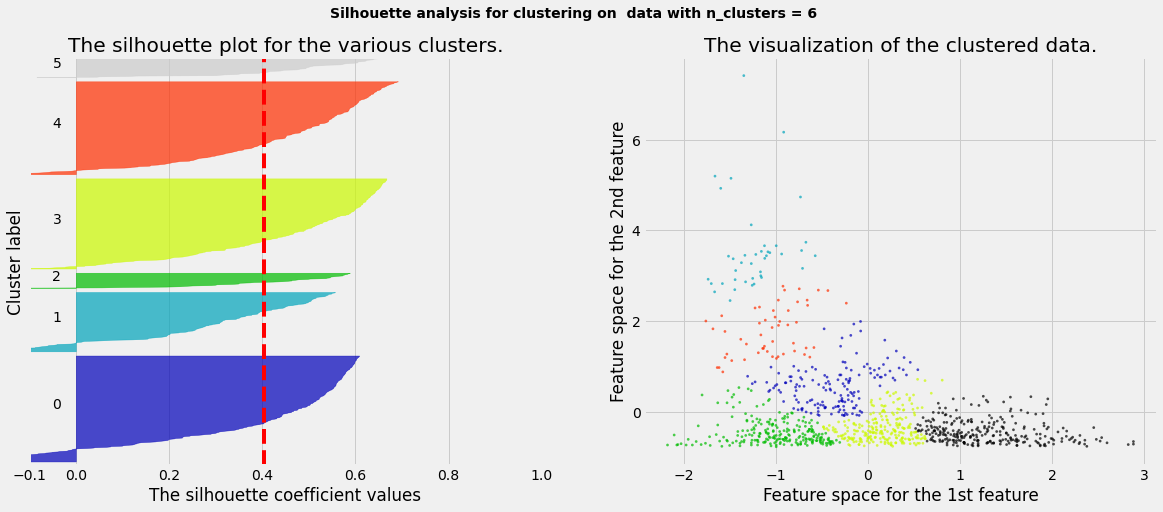

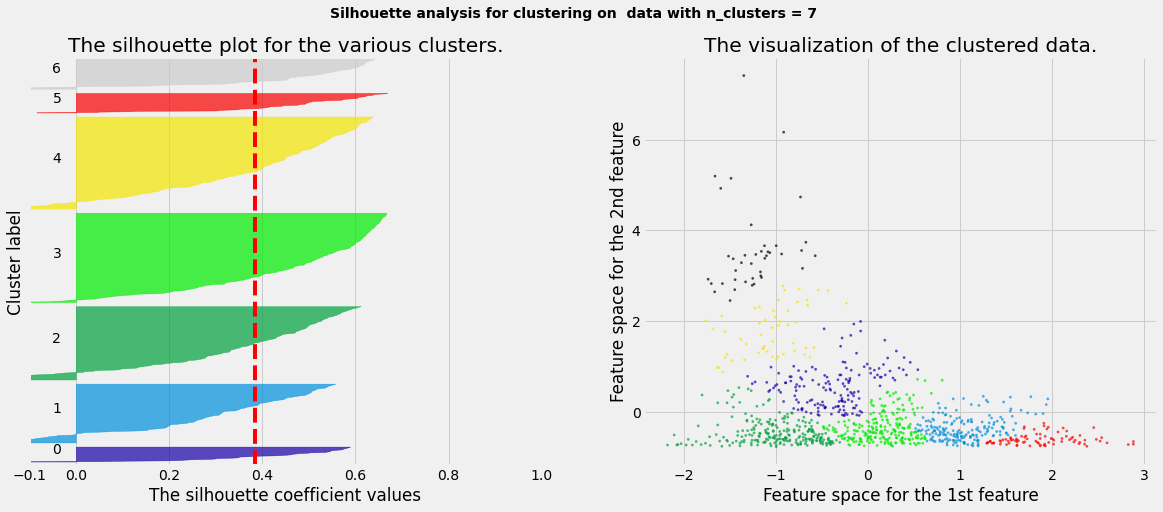

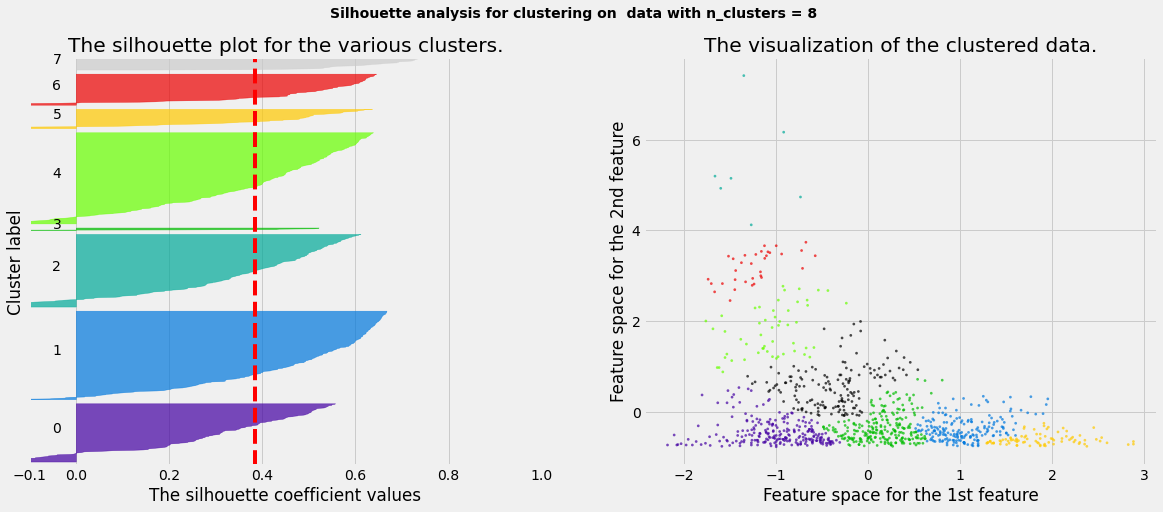

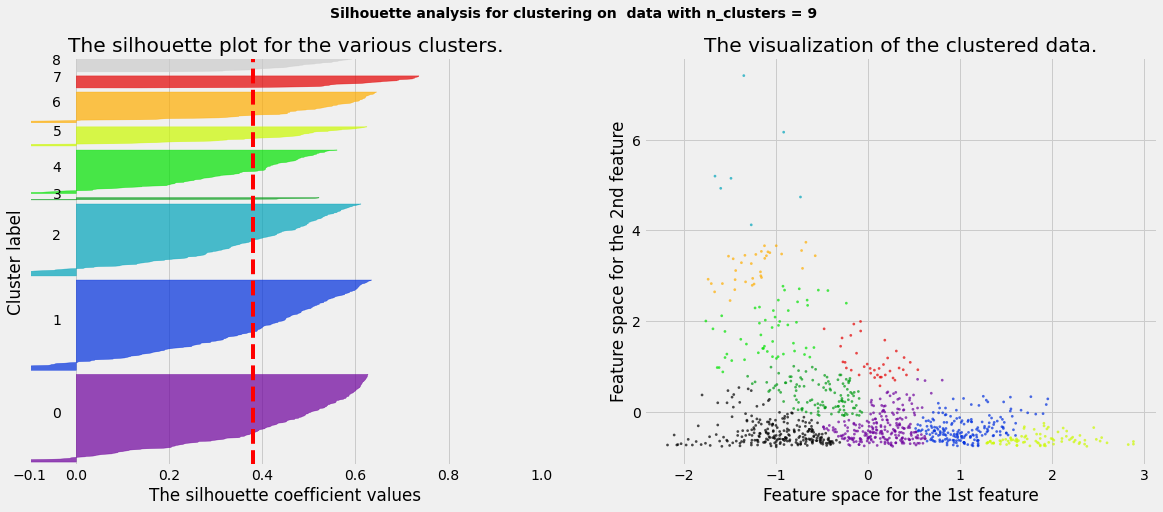

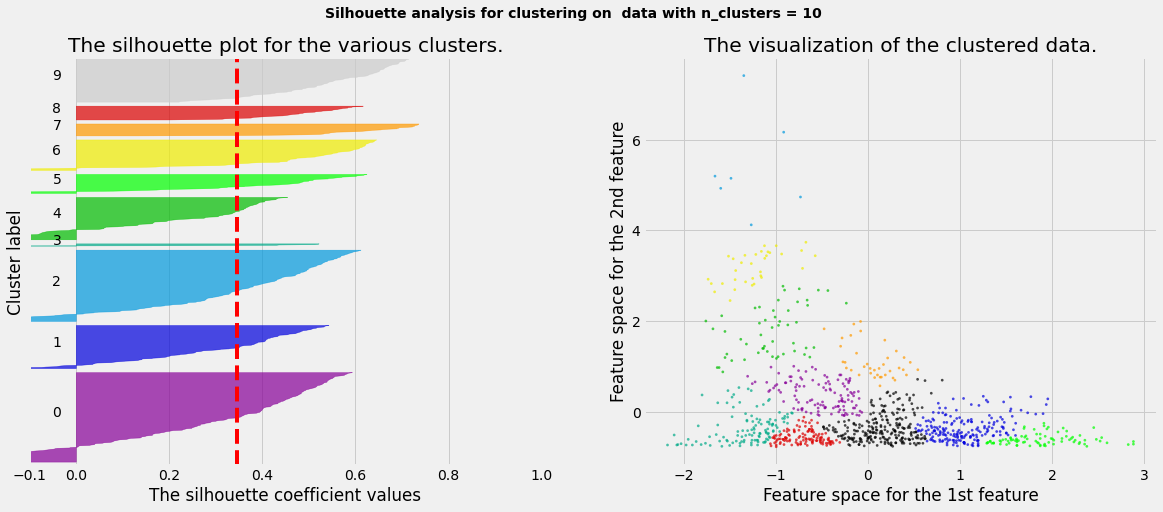

In [206]:
for n_clusters in range(4,11):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
 
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(grouped) + (n_clusters) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
    cluster_labels = clusterer.fit_predict(segmentation_df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(segmentation_df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(segmentation_df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i+1) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral((cluster_labels.astype(float)) / n_clusters)
    ax2.scatter(segmentation_df.iloc[:, 0], segmentation_df.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

   

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for clustering on  data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()



In [207]:
clusterer = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')
cluster_labels = clusterer.fit_predict(segmentation_df)

In [208]:
segmentation_df['labels']=cluster_labels
segmentation_df

<ipython-input-208-acd33e03167d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segmentation_df['labels']=cluster_labels


,days_since_prior_order_scaled,freq_scaled,labels
0,-1.584293,-0.767957,3
1,0.716960,-0.422004,0
2,1.345605,-0.700688,0
3,0.729239,-0.662249,0
4,-0.895523,0.635072,1
...,...,...,...
995,2.017235,-0.633420,0
996,1.296929,-0.691078,0
997,-1.466349,-0.691078,3
998,1.436537,-0.518102,0


In [211]:
grouped['labels']=segmentation_df['labels']
grouped

,user_id,labels
0,113,3
1,131,0
2,421,0
3,519,0
4,558,1
...,...,...
995,204775,0
996,204955,0
997,205017,3
998,205316,0


In [214]:
final_df=pd.merge(df,grouped,on=['user_id'],how='left')

In [215]:
final_df.to_csv('Final_df.csv',index=False)